# **Deep Learning**

1. Training Neural Networks
2. Convolution Neural Network
3. 

# **1. Training Neural Networks**

## 1.1 Activation Functions

### **1) Sigmoid activation**

![sigmoid](_image/sigmoid.png)

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

앞서 배웠듯이 0 ~ 1 사이 값을 가지는 함수입니다. 그러나 Neural Networks에서 사용하기엔 많은 문제점이 있습니다.

- 기울기 소실
- output의 중간값이 0이 아니다.
- exp()의 연산이 너무 무겁다.

### **2) Softmax activation**

$$P_i = \frac{e^{z_i}}{\sum_{j = 1}^k e^{z_j}}$$

sigmoid가 두 개의 값으로 분류한다면 softmax는 여러 가지 값으로 분류한다. 

### **3) tanh activation**

![tanh](_image/tanh.png)

$$tanh(x) = 2 \times sigmoid(x) - 1$$

-1 ~ 1의 범위를 갖고 있습니다. sigmoid의 문제점 중 하나인 output의 중간값을 0으로 만들었습니다. 그러나 기울기 소실 문제는 여전히 남아있습니다.

### **4) ReLU(Rectified Linear Unit)**

![ReLU](_image/ReLU.png)

$$computes \; f(x) = max(0, x)$$

학습이 굉장히 빠르고 기울기 소실 문제가 사라집니다. output의 중간값이 0은 아니지만 많이 사용됩니다.

## 1.2 Batch Normalization

sigmoid나 tanh에서 중요한 것 중 하나는 기울기가 살아있는 범위에 input 데이터가 들어가야 유의미한 값이 나온다는 것입니다. 그걸 위해 사용하는 방법이 **Batch Normalization** 입니다. 이를 통해 기울기 소실 문제를 해결할 수 있습니다. 

$$\hat{x}^{(k)} = \frac{x^{(k)} - \text{E}[x^{(k)}]}{\sqrt{\text{Var}[x^{(k)}]}}$$

위 식을 통해 평균 0, 분산 1의 input data가 만들어집니다. 

그 후, Neural Network가 데이터에 말맞게 평균과 분산을 조절합니다.

$$y^{(k)} = \gamma^{(k)} \hat{x}^{(k)} + \beta^{(k)}$$

이를 통해 $\gamma$는 표준편차를, $\beta$는 평균을 학습시킨다. 이렇게 $\gamma , \beta$의 최적값을 구하는 것이다.

## 1.3 Optimization Methods

optimization을 위한 방법은 여러가지가 있습니다. 왜냐하면 gradient descent를 그대로 사용하면 변동폭이 너무 크게 일어나기 때문입니다. 이제 하나씩 살펴보겠습니다.

여러 방식들이 어떻게 이루어지는지 gif로 보려면 다음 링크로 접속하여 확인하면 됩니다.
http://www.denizyuret.com/2015/03/alec-radfords-animations-for.html

In [4]:
import numpy as np

x = 5 # input data
dx = 2 # gradient
learning_rate = 0.1 # learning rate

### **1) Gradient Descent(SGD)**

![sgd](_image/sgd.png)

일반적인 방법은 현재 자신의 위치에서 측정한 경사에 따라 움직입니다. 그렇기에 위 그림처럼 진동이 엄청나게 일어납니다.

In [2]:
# Vanilla gradient descent update
x -= learning_rate * dx

### **2) Momentum**

![momentum](_image/momentum.png)

Momentum은 현재 위치에서 측정한 기울기만 사용하지 않습니다. 전에 지나온 기울기들을 계속해서 합산하여 사용합니다. 그렇기 때문에 진동이 큰 방향은 진동 크기를 줄이고 맞는 방향은 더욱 빠르게 가도록 해줍니다. 

기울기를 합산할 때, 예전 기울기의 영향력을 줄이기 위해서 0.8 등의 공비를 계속해서 곱해줍니다. 

<img src = "https://miro.medium.com/max/1000/1*X9SaxFM6_sBOAMY9TaGsKw.png">

이름이 momentum이듯, 관성처럼 local minimum에 머물지 않고 global minimum으로 가도록 만들어줍니다.

이를 코드로 보면 다음과 같습니다.

In [3]:
# Momentum update
mu = 0.8 # 공비
v = 0

v = mu * v - learning_rate * dx
x += v

### **3) Adagrad**

기울기들을 합산할 때, 기울기의 크기가 많이 차이나지 않도록 기울기를 제곱해서 합을 구한다음 루트를 취하여 기울기에 나눠줍니다. 코드를 통해 살펴보겠습니다. 

In [5]:
# Adagrad update
cache = 0

cache += dx**2
x -= learning_rate * dx / (np.sqrt(cache) + 1e-7)

이때 1e-7을 더해주는 이유는 cache가 너무 작아져서 0이 되어 error가 나는 것을 방지하기 위해서입니다.

Adagrad는 방향을 잘 찾아가지만 목표에 도달할수록 나누는 값이 너무 커집니다. 그렇기에 한 번의 가는 거리가 점점 작아지고 속도가 느려지게 됩니다.

그렇기에 Adagrad를 직접 사용하지 않고 이를 활용하는 방법들을 사용합니다.

### **4) RMSProp**

Adagrad에서 decay_rate를추가하여 오래된 기울기들의 영향력을 제거하는 방식을 도입한 것이 RMSProp입니다. 코드로 구현하면 다음과 같습니다.

In [6]:
decay_rate = 0.1

# RMSProp update
cache += decay_rate * cache + (1 - decay_rate) * dx**2
x -= learning_rate * dx / (np.sqrt(cache) + 1e-7)

### **5) Adam**

RMSProp와 Momentum 방식을 합쳐서 사용하는 방법이 Adam입니다. 기본적으로 beta1 = 0.9, beta2 = 0.999, eps = 1e-8을 추천됩니다. 코드로 나타내면 다음과 같습니다.

In [7]:
# Adam upgrade
m, v = 0, 0
beta1, beta2 = 0.9, 0.999

m = beta1 * m + (1 - beta1) * dx
v = beta2 * v + (1 - beta2) * (dx**2)
x -= learning_rate * m / (np.sqrt(v) + 1e-7)

## 1.4 Learning Rate

Learning rate는 gradient descent에서 움직이는 보폭 비율이라고 생각하면 됩니다. 그렇기에 learning rate가 크면 크게크게 학습하고 작으면 차근차근 학습하게 됩니다. learning rate의 크기에 따라 학습 정도를 살펴보면 다음과 같습니다.

![learning_rate](_image/learning_rate.png)

하나씩 살펴보면 먼저 작은 값을 가지면 학습속도가 매우 느립니다. 만약 큰 값을 가진다면 학습속도가 빠르지만 어느 순간부터 학습이 진행되지 않습니다. 왜냐하면 현재 위치와 목표점의 거리보다 보폭이 더 크기 때문입니다. 그리고 만약 매우 큰 값을 가진다면 학습이 될 수 있지만 금방 발산해버립니다.

그렇기 때문에 epoch가 진행될수록 learning rate를 줄이는 방법을 사용합니다.


![learning_rate2](_image/learning_rate2.png)

위 그림처럼 loss가 줄지 않을 때마다 learning rate를 줄여서 학습을 진행합니다. 

learning rate를 늘리거나 줄일 땐, 0.1, 1, 10, 100,... 등 10배씩 키우거나 줄이는 것이 일반적입니다. 또는 $\sqrt{10} \sim 3$을 이용해 3배씩 키우거나 줄입니다.

## 1.5 Ensemble

![ensemble](_image/ensemble.png)


위 그림처럼 여러 가지 모델들의 결과를 합쳐서 하나의 평균값으로 예측하는 것을 Ensemble이라고 합니다. Ensemble은 대체적으로 2 ~ 3% 정도 정답률이 증가합니다.

## 1.6 Regularization

### **1) L1, L2 Regularization**

$$L1 : \sum_k \sum_l \lvert W_{k, l} \rvert \quad (W : \text{weight decay})$$
$$L2 : \sum_k \sum_l (W_{k, l})^2$$
$$Elastic net(\text{L1 + L2}) : \sum_k \sum_l (\beta W_{k, l}^2 + \lvert W_{k, l} \rvert)$$

### **2) Dropout**

한 모델에 여러 뉴런이 있습니다. 이 중 임의로 몇 개의 뉴런을 무시하여 다양한 모델들을 사용하는 결과를 주는, 즉 ensemble 효과를 주는 방법을 Dropout이라고 합니다. 

![dropout](_image/dropout.png)

위 그림처럼 임의의 뉴런을 무시하고 진행하는 방식입니다. 위 방식을 여러번 사용하여 ensemble처럼 모든 모델들의 예측값의 평균을 내서 결과를 예측합니다.

주의할 점은 Dropout했던 모델을 테스트할 때는 모든 노드를 사용한다는 것입니다. 그렇기에 output이 학습할 때보다 크게 나오게 됩니다. 이를 방지하기 위해 학습 때 사용한 노드의 비중만큼만 output에서 가져옵니다.

예를 들어 70%의 뉴런만 사용하여 학습을 진행했다면 실제 테스트할 때도 ouput의 70%를 실제 예측값으로 사용하게 됩니다.

이를 코드로 나타내면 다음과 같습니다.

In [8]:
p = 0.5 # probability of keeping a unit active, higher = less dropout


def train_step(X, W, b):
    """X contains the data"""
    
    # forward pass for example 3-layer neural network
    H1 = np.maximum(0, np.dot(W[0], X) + b[0])
    U1 = np.random.rand(*H1.shape) < p # first dropout mask
    H1 *= U1 # drop
    H2 = np.maximum(0, np.dot(W[1], H1) + b[1])
    U2 = np.random.rand(*H2.shape) < p # second dropout mask
    H2 *= U2 # drop
    out = np.dot(W[2], H2) + b[2]
    
    # backward pass: compute gradients...(not shown)
    # perform parameter update...(not shown)

In [9]:
def predict(X, W, b):
    # ensemble forward pass
    H1 = np.maximum(0, np.dot(W[0], X) + b[0]) * p # scale the activations
    H2 = np.maximum(0, np.dot(W[1], H1) + b[1]) * p # scale the activations
    out = np.dot(W[2], H2) + b[2]

### **3) Data Augmentation**

가진 데이터들이 적을 때나 더 많이 필요할 때, 데이터들을 변형, 회전, 늘림 등의 과정을 통해 데이터를 늘리는 것을 말합니다.

## 실습1. PyTorch Tutorial

In [10]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

### **1) Tensor operation**

텐서는 배열이나 행렬과 매우 유사한 자료구조입니다. PyTorch에서는 텐서를 사용하여 모델의 입력과 출력뿐만 아니라 모델의 파라미터를 나타냅니다.

GPU나 다른 연산 가속을 위한 특수한 하드웨어에서 실행할 수 있다는 점을 제외하면, 텐서는 NumPy의 ndarray와 매우 유사합니다.

이제 텐서에 대한 다양한 구현을 알아보겠습니다.

In [11]:
# 데이터로부터 직접 생성하기
data = [[1, 2], [3, 4]]
x = torch.tensor(data)
x

tensor([[1, 2],
        [3, 4]])

In [12]:
# numpy array로부터 생성하기
np_array = np.array(data)
x = torch.from_numpy(np_array)
x

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [13]:
# tensor에서 numpy array로 변환하기
x.numpy()

array([[1, 2],
       [3, 4]])

In [14]:
# 다른 텐서와 같은 모양의 텐서 초기화하기
x_ones = torch.ones_like(x) # x_data의 속성을 유지합니다.
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x, dtype=torch.float) # x_data의 속성을 덮어씁니다.
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]], dtype=torch.int32) 

Random Tensor: 
 tensor([[0.0851, 0.0584],
        [0.3296, 0.2676]]) 



In [15]:
# 주어진 shape로 초기화하기
shape = (3,4)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.4402, 0.1129, 0.1370, 0.3384],
        [0.3500, 0.0489, 0.0349, 0.6645],
        [0.6792, 0.5942, 0.9422, 0.8516]]) 

Ones Tensor: 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


텐서의 속성은 텐서의 모양, 자료형 및 어느 장치에 저장되는지를 나타냅니다.

In [17]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [20]:
# 현재 노트북은 gpu가 없다

#device = torch.device('cuda')
#tensor = tensor.to(device)
#print(f"Device tensor is stored on: {tensor.device}")

그리고 텐서간의 연산도 가능합니다.

In [21]:
# numpy 식의 인덱싱과 슬라이싱
tensor = torch.ones(3, 4)
tensor[:, 1] = 0
tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [22]:
# 텐서 합치기, 행으로 길어지도록
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [24]:
# 텐서 합치기, 열로 이어지도록
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [25]:
# 텐서 곱하기

# 요소별 곱(element-wise product)을 계산합니다
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")

# 다른 문법:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [26]:
# 텐서 간 행렬 곱셈
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# 다른 문법:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])


### **2) Autograd**

PyTorch에는 torch.autograd라고 불리는 자동 미분 엔진이 내장되어 있습니다. autograd를 통해 입력 X, 파라미터 W , 그리고 cross-entropy loss를 사용하는 logistic regression model의 gradient를 구하겠습니다.

In [27]:
# 입력 및 파라미터 초기화
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
print(x)
print(y)
print(w)
print(b)

tensor([1., 1., 1., 1., 1.])
tensor([0., 0., 0.])
tensor([[ 0.6696, -1.1055,  0.7509],
        [ 0.2827,  0.7063,  1.1959],
        [ 0.4497,  0.8117,  0.0219],
        [ 0.3535,  0.1437,  1.7595],
        [-0.3871,  0.4001, -1.1086]], requires_grad=True)
tensor([-1.2913,  0.2003,  0.2606], requires_grad=True)


In [28]:
# forward
z = torch.matmul(x,w)+b
z

tensor([0.0770, 1.1566, 2.8803], grad_fn=<AddBackward0>)

PyTorch에서는 node를 크게 2가지 방법의 api를 활용해서 사용합니다.

1. torch.nn
2. torch.nn.functional

torch.nn은 사전에 node를 초기화하고 해당 node에 텐서를 통과시켜 값을 받는 형태지만, torch.nn.functional은 사전에 초기화없이 바로 함수처럼 사용하는 방식입니다.

코딩 스타일에 맞춰서 원하시는 api를 사용하시면 됩니다.

In [29]:
# 비용 함수
loss_fn = torch.nn.BCEWithLogitsLoss()
loss = loss_fn(z, y)
loss

tensor(1.6991, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [30]:
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)
loss

tensor(1.6991, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

모델에서 매개변수의 가중치를 최적화하려면 파라미터에 대한 loss function의 도함수(derivative)를 계산해야 합니다. 
이러한 도함수를 계산하기 위해, loss.backward() 를 호출한 다음 w.grad와 b.grad에서 값을 가져옵니다

In [31]:
loss.backward()
print(x.grad)
print(w.grad)
print(b.grad)

None
tensor([[0.1731, 0.2536, 0.3156],
        [0.1731, 0.2536, 0.3156],
        [0.1731, 0.2536, 0.3156],
        [0.1731, 0.2536, 0.3156],
        [0.1731, 0.2536, 0.3156]])
tensor([0.1731, 0.2536, 0.3156])


기본적으로, requires_grad=True인 모든 텐서들은 연산 기록을 추적하고 미분 계산을 지원합니다. 그러나 모델을 학습한 뒤 입력 데이터를 단순히 적용하기만 하는 경우와 같이 forward 연산만 필요한 경우에는, 미분 연산을 위한 값들을 저장해두는 것이 속력 및 메모리의 저하를 가져올 수 있습니다. 연산 코드를 torch.no_grad() 블록으로 둘러싸서 미분 추적을 멈출 수 있습니다:

In [32]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


## 실습2. LR vs MLP

이제 MNIS dataset을 활용하여 logistic regression model과 MLP model을 구현해보고 학습 파이프라인을 익혀보겠습니다.

### **1) Import packages**

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.functional as F
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

device = 'cuda' if torch.cuda.is_available is True else 'cpu'
device

'cpu'

### **2) Preprocess Dataset**

In [2]:
# load dataset
mnist = fetch_openml('mnist_784', cache=False)

In [3]:
mnist.data.shape

(70000, 784)

mnist에 존재하는 각각의 사진은 28*28의 픽셀로 구성된 784차원짜리 벡터로 나타나져 있습니다. 각 픽셀은 0~255 사이의 값으로 흰색부터 검은색 사이의 값을 나타냅니다. 

In [4]:
# preprocess dataset
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')
X = X.values
y = y.values
print(X.shape)
print(y.shape)

# scale
X /= 255.0
print(X.min(), X.max())

(70000, 784)
(70000,)
0.0 1.0


In [5]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)
print(X_train.shape) # 80%
print(y_train.shape)
print(X_val.shape) # 10%
print(y_val.shape)
print(X_test.shape) # 10%
print(y_test.shape)

(56000, 784)
(56000,)
(7000, 784)
(7000,)
(7000, 784)
(7000,)


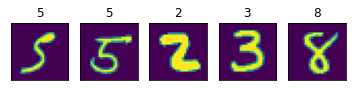

In [6]:
# visualize dataset
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)
        

plot_example(X_train, y_train)

### **3) PyTorch Dataset**

PyTorch에서는 Custom Dataset을 사용하기 위해서는 torch.utils.data.Dataset의 형태로 dataset class를 정의해준 이후, torch.utils.data.DataLoader의 형태로 dataloader class를 정의하여 학습시에 model에 forwarding할 data를 sample해줍니다.

(https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)


가장 보편적으로 사용되는 map-style의 dataset class는 torch.utils.data.Dataset을 superclass로 받아 **getitem()** 과 **len()** 함수를 override해줍니다.

In [7]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        super(CustomDataset, self).__init__()
        self.X = X
        self.y = y
        
    def __getitem__(self, index):
        x = self.X[index]
        y = self.y[index]
        x = torch.from_numpy(x).float()
        y = torch.from_numpy(np.array(y)).long()
        return x, y

    def __len__(self):
        return len(self.X)

In [8]:
train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)
test_dataset = CustomDataset(X_test, y_test)

print(len(train_dataset))
print(train_dataset.X.shape)
print(len(val_dataset))
print(val_dataset.X.shape)
print(len(test_dataset))
print(test_dataset.X.shape)

56000
(56000, 784)
7000
(7000, 784)
7000
(7000, 784)


DataLoader는 train 혹은 validation시 dataset에서 batch를 sampling하기 위한 API입니다 (https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

필수적으로 사용하는 option들은 아래와 같습니다.
- dataset: sampling할 dataset
- batch_size: 한번에 sampling할 dataset의 개수
- shuffle: 1 epoch를 기준으로 dataset을 shuffle할지

더 자세한 option은 api를 참고해주세요.

In [9]:
batch_size = 64

# shuffle the train data
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# do not shuffle the val & test data
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# dataset size // batch_size
print(len(train_dataloader))
print(len(val_dataloader))
print(len(test_dataloader))

875
110
110


### **4) Model**

Pytorch에서 model을 선언할 때는 torch.nn.Module class를 superclass로 받아 __init__()함수와 forward() 함수를 작성해줍니다.

__init__()함수에는 모델의 파라미터들을 선언하고, forward함수에는 해당 파라미터들을 이용하여 data를 model에 통과시켜줍니다.

https://pytorch.org/docs/stable/generated/torch.nn.Module.html

In [10]:
# Initialize Logistic Regression Model
class LR(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LR, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        x = self.fc(x)
        return x

In [11]:
# Initialize MLP Model
class MLP(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

### **5) Train**

이제 선언한 model을 통해 학습을 진행하기 위해선 파라미터를 최적화할 optimizer가 필요합니다. 이번 실습에선 가장 보편적으로 사용되는 Adam optimizer를 사용하겠습니다.

In [12]:
# Trainer
class Trainer():
    def __init__(self, trainloader, valloader, testloader, model, optimizer, criterion, device):
        """
        trainloader: train data's loader
        testloader: test data's loader
        model: model to train
        optimizer: optimizer to update your model
        criterion: loss function
        """
        self.trainloader = trainloader
        self.valloader = valloader
        self.testloader = testloader
        self.model = model
        self.optimizer = optimizer
        self.criterion = criterion
        self.device = device
        
    def train(self, epoch = 1):
        # 학습을 시작하기 위해 model을 train-mode로 변경
        self.model.train()
        for e in range(epoch):
            running_loss = 0.0  
            for i, data in enumerate(self.trainloader, 0): 
                inputs, labels = data 
                # model에 input으로 tensor를 gpu-device로 보낸다
                inputs = inputs.to(self.device)  
                labels = labels.to(self.device)
                # zero the parameter gradients
                # optimizer는 예전 기울기도 계속 저장하기에 기울기를 초기화해준다.
                self.optimizer.zero_grad()    
                # forward + backward + optimize
                # get output after passing through the network
                outputs = self.model(inputs) 
                # compute model's score using the loss function
                loss = self.criterion(outputs, labels)  
                # perform back-propagation from the loss
                loss.backward() 
                # gradient descent를 통해 model의 output을 얻는다.
                self.optimizer.step() 
                running_loss += loss.item()
            
            print('epoch: %d  loss: %.3f' % (e + 1, running_loss / len(self.trainloader)))
            running_loss = 0.0
        val_acc = self.validate()
        return val_acc

    def validate(self):
        # 현재 model이 train-mode일 수 있기에 eval-mode로 바꿔 validate를 수행할 수 있도록 변경
        self.model.eval() 
        correct = 0
        for inputs, labels in self.valloader:
            inputs = inputs.to(self.device)
            labels = labels.to(self.device)
            output = self.model(inputs) 
            pred = output.max(1, keepdim=True)[1] # get the index of the max 
            correct += pred.eq(labels.view_as(pred)).sum().item()
        return correct / len(self.valloader.dataset)
        
    def test(self):
        self.model.eval() 
        correct = 0
        for inputs, labels in self.testloader:
            inputs = inputs.to(self.device)
            labels = labels.to(self.device)
            output = self.model(inputs) 
            pred = output.max(1, keepdim=True)[1] # get the index of the max 
            correct += pred.eq(labels.view_as(pred)).sum().item()
        return correct / len(self.testloader.dataset)


In [64]:
# Logistic Regression
input_dim = 784
output_dim = 10
epoch = 4

best_acc = 0.0
lrs = [1e-1, 1e-2, 1e-3, 1e-4]
for lr in lrs:
    model = LR(input_dim=input_dim, output_dim=output_dim).to(device)
    criterion = nn.CrossEntropyLoss().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    trainer = Trainer(train_dataloader, val_dataloader, test_dataloader, model, optimizer, criterion, device)
    val_acc = trainer.train(epoch = epoch)
    print('val_acc: %.3f' %(val_acc))
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), 'models/3-1_logistic_model')

trainer.model.load_state_dict(torch.load('models/3-1_logistic_model'))
test_acc = trainer.test()
print('test_acc: %.3f' %(test_acc))

epoch: 1  loss: 1.166
epoch: 2  loss: 1.194
epoch: 3  loss: 1.261
epoch: 4  loss: 1.297
val_acc: 0.886
epoch: 1  loss: 0.356
epoch: 2  loss: 0.305
epoch: 3  loss: 0.296
epoch: 4  loss: 0.294
val_acc: 0.919
epoch: 1  loss: 0.555
epoch: 2  loss: 0.325
epoch: 3  loss: 0.295
epoch: 4  loss: 0.281
val_acc: 0.924
epoch: 1  loss: 1.387
epoch: 2  loss: 0.735
epoch: 3  loss: 0.557
epoch: 4  loss: 0.474
val_acc: 0.893
test_acc: 0.919


In [65]:
# MLP
input_dim = 784
hidden_dim = 32
output_dim = 10
epoch = 4

best_acc = 0.0
lrs = [1e-1, 1e-2, 1e-3, 1e-4]
for lr in lrs:
    model = MLP(input_dim=input_dim, 
                hidden_dim=hidden_dim,
                output_dim=output_dim).to(device)
    criterion = nn.CrossEntropyLoss().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    trainer = Trainer(train_dataloader, val_dataloader, test_dataloader, model, optimizer, criterion, device)
    val_acc = trainer.train(epoch = epoch)
    print('val_acc: %.3f' %(val_acc))
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), 'models/3-1_MLP_model')

trainer.model.load_state_dict(torch.load('models/3-1_MLP_model'))
test_acc = trainer.test()
print('test_acc: %.3f' %(test_acc))

epoch: 1  loss: 0.930
epoch: 2  loss: 0.956
epoch: 3  loss: 1.004
epoch: 4  loss: 1.003
val_acc: 0.678
epoch: 1  loss: 0.278
epoch: 2  loss: 0.170
epoch: 3  loss: 0.148
epoch: 4  loss: 0.133
val_acc: 0.956
epoch: 1  loss: 0.472
epoch: 2  loss: 0.254
epoch: 3  loss: 0.206
epoch: 4  loss: 0.173
val_acc: 0.950
epoch: 1  loss: 1.298
epoch: 2  loss: 0.553
epoch: 3  loss: 0.414
epoch: 4  loss: 0.358
val_acc: 0.911
test_acc: 0.953


## 실습3. Activation Function

이제 activation function 중 가장 대표적으로 사용되는 sigmoid functio과 ReLU function을 사용해보고 비교해보겠습니다. 데이터는 실습 2에서 사용했던 MNIST를 사용합니다. 모델은 train과 test만 사용하겠습니다.

![](https://drive.google.com/uc?export=view&id=1xfJBd9v9L_RgXGf8urNrYpb40zXU6gea)

- input: 784
- hidden: 32 or (32, 32)
- output: 10
- **activation: sigmoid or relu**
- optimizer: sgd
- loss: cross-entropy

### **0) Prerequisite**

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

device = 'cuda' if torch.cuda.is_available is True else 'cpu'
device

'cpu'

#### **Load Dataset**

In [20]:
mnist = fetch_openml('mnist_784', cache=False)
X = mnist.data.astype('float32').values
y = mnist.target.astype('int64').values
X /= 255.0
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


#### **Split Dataset**

학습과 평가를 위한 dataset으로 나눕니다.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(56000, 784)
(56000,)
(14000, 784)
(14000,)


#### **Pytorch Dataset**

In [22]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        super(CustomDataset, self).__init__()
        self.X = X
        self.y = y
        
    def __getitem__(self, index):
        x = self.X[index]
        y = self.y[index]
        x = torch.from_numpy(x).float()
        y = torch.from_numpy(np.array(y)).long()
        return x, y

    def __len__(self):
        return len(self.X)

In [23]:
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

print(len(train_dataset))
print(train_dataset.X.shape)
print(len(test_dataset))
print(test_dataset.X.shape)

56000
(56000, 784)
14000
(14000, 784)


#### **DataLoader**


In [24]:
batch_size = 64

# shuffle the train data
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# do not shuffle the val & test data
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# dataset size // batch_size
print(len(train_dataloader))
print(len(test_dataloader))

875
219


#### **Trainer**


In [25]:
class Trainer():
    def __init__(self, trainloader, testloader, model, optimizer, criterion, device):
        """
        trainloader: train data's loader
        testloader: test data's loader
        model: model to train
        optimizer: optimizer to update your model
        criterion: loss function
        """
        self.trainloader = trainloader
        self.testloader = testloader
        self.model = model
        self.optimizer = optimizer
        self.criterion = criterion
        self.device = device
        
    def train(self, epoch = 1):
        self.model.train()
        for e in range(epoch):
            running_loss = 0.0  
            for i, data in enumerate(self.trainloader, 0): 
                inputs, labels = data 
                # model에 input으로 tensor를 gpu-device로 보낸다
                inputs = inputs.to(self.device)  
                labels = labels.to(self.device)
                # zero the parameter gradients
                self.optimizer.zero_grad()    
                # forward + backward + optimize
                outputs = self.model(inputs) 
                loss = self.criterion(outputs, labels)  
                loss.backward() 
                self.optimizer.step() 
                running_loss += loss.item()
            
            print('epoch: %d  loss: %.3f' % (e + 1, running_loss / len(self.trainloader)))
            running_loss = 0.0
        
    def test(self):
        self.model.eval() 
        correct = 0
        for inputs, labels in self.testloader:
            inputs = inputs.to(self.device)
            labels = labels.to(self.device)
            output = self.model(inputs) 
            pred = output.max(1, keepdim=True)[1] # get the index of the max 
            correct += pred.eq(labels.view_as(pred)).sum().item()
        test_acc = correct / len(self.testloader.dataset)
        print('test_acc: %.3f' %(test_acc))

### **1) 2-layer Network + Sigmoid**

In [29]:
class MLP(nn.Module):
    def __init__(self, 
                input_dim=784, 
                hidden_dim=32, 
                output_dim=10):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        return x

model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
model.to(device)

MLP(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=10, bias=True)
)

In [30]:
trainer = Trainer(trainloader = train_dataloader,
                testloader = test_dataloader,
                model = model,
                criterion = criterion,
                optimizer = optimizer,
                device = device)

trainer.train(epoch = 10)

C:\Users\delphinus\anaconda3\envs\nlp\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch: 1  loss: 2.187
epoch: 2  loss: 1.817
epoch: 3  loss: 1.386
epoch: 4  loss: 1.079
epoch: 5  loss: 0.882
epoch: 6  loss: 0.754
epoch: 7  loss: 0.666
epoch: 8  loss: 0.602
epoch: 9  loss: 0.553
epoch: 10  loss: 0.515


In [31]:
trainer.test()

test_acc: 0.877


### **2) 2-layer Network + ReLU**

In [32]:
class MLP(nn.Module):
    def __init__(self, 
                input_dim=784, 
                hidden_dim=32, 
                output_dim=10):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
model.to(device)

MLP(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=10, bias=True)
)

In [33]:
trainer = Trainer(trainloader = train_dataloader,
                testloader = test_dataloader,
                model = model,
                criterion = criterion,
                optimizer = optimizer,
                device = device)

trainer.train(epoch = 10)

epoch: 1  loss: 1.298
epoch: 2  loss: 0.527
epoch: 3  loss: 0.409
epoch: 4  loss: 0.364
epoch: 5  loss: 0.340
epoch: 6  loss: 0.323
epoch: 7  loss: 0.310
epoch: 8  loss: 0.299
epoch: 9  loss: 0.290
epoch: 10  loss: 0.282


In [34]:
trainer.test()

test_acc: 0.917


Activation function에 따른 성능 차이가 보입니다. Sigmoid는 기울기 소실 문제가 발생하지만 그에 비해 ReLU는 기울기 소실 문제가 없기 때문입니다. 이제 층을 늘려보겠습니다.

### **3) 3-layer Network + Sigmoid**

In [35]:
class MLP(nn.Module):
    def __init__(self, 
                input_dim=784, 
                hidden_dim=(32,32), 
                output_dim=10):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim[0])
        self.fc2 = nn.Linear(hidden_dim[0], hidden_dim[1])
        self.fc3 = nn.Linear(hidden_dim[1], output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        return x

model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
model.to(device)

MLP(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [36]:
trainer = Trainer(trainloader = train_dataloader,
                testloader = test_dataloader,
                model = model,
                criterion = criterion,
                optimizer = optimizer,
                device = device)

trainer.train(epoch = 10)

epoch: 1  loss: 2.303
epoch: 2  loss: 2.295
epoch: 3  loss: 2.288
epoch: 4  loss: 2.278
epoch: 5  loss: 2.259
epoch: 6  loss: 2.221
epoch: 7  loss: 2.147
epoch: 8  loss: 2.027
epoch: 9  loss: 1.887
epoch: 10  loss: 1.741


In [37]:
trainer.test()

test_acc: 0.504


### **4) 3-layer Network + ReLU**

In [38]:
class MLP(nn.Module):
    def __init__(self, 
                input_dim=784, 
                hidden_dim=(32,32), 
                output_dim=10):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim[0])
        self.fc2 = nn.Linear(hidden_dim[0], hidden_dim[1])
        self.fc3 = nn.Linear(hidden_dim[1], output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
model.to(device)

MLP(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [39]:
trainer = Trainer(trainloader = train_dataloader,
                testloader = test_dataloader,
                model = model,
                criterion = criterion,
                optimizer = optimizer,
                device = device)

trainer.train(epoch = 10)

epoch: 1  loss: 1.875
epoch: 2  loss: 0.635
epoch: 3  loss: 0.415
epoch: 4  loss: 0.356
epoch: 5  loss: 0.326
epoch: 6  loss: 0.305
epoch: 7  loss: 0.288
epoch: 8  loss: 0.273
epoch: 9  loss: 0.261
epoch: 10  loss: 0.248


In [40]:
trainer.test()

test_acc: 0.928


### **5) 결론**

우선 4가지 경우의 accuracy를 표로 정리하겠습니다.

||Sigmoid|ReLU|
|:---:|:---:|:---:|
|2-layer|0.877|0.917|
|3-layer|0.504|0.928|

ReLU의 경우 어느 정도 비슷해보이지만 Sigmoid의 경우 accuracy가 거의 절반으로 떨어진 것을 볼 수 있습니다. 

Sigmoid의 경우 층이 추가되면서 기울기 소실이 일어난 것으로 보입니다. 그에 반해 ReLU는 기울기 소실이 발생하지 않기에 층이 쌓여도 정확도가 떨어지지는 않습니다. 

만약 activation function이 없다면 가중치와 입력값의 곱으로만 뉴런이 이루어집니다. 이는 non-linear한 데이터를 표현할 수 없음을 의미합니다. 그리고 층을 여러개 쌓일 필요도 없어집니다. 그렇기에 non-linear한 데이터도 잘 표현하기 위해서 activation function은 필요합니다.

## 실습4. Optimization

실습 3에 이어서 이번 실습에선 sgd, momentun, Adam 등의 optimizer를 사용해보고 성능을 비교해보겠습니다.

![](https://drive.google.com/uc?export=view&id=1xfCTx8xj4zoaombrK2bSN9nv0Z3r95jp)

- input: 784
- hidden: (32, 32)
- output: 10
- activation: relu
- **optimizer: sgd** or **momentum** or **adam**
- loss: cross-entropy

### **0) MLP Model**

In [41]:
class MLP(nn.Module):
    def __init__(self, 
                input_dim=784, 
                hidden_dim=(32,32), 
                output_dim=10):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim[0])
        self.fc2 = nn.Linear(hidden_dim[0], hidden_dim[1])
        self.fc3 = nn.Linear(hidden_dim[1], output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

### **1) 3-layer Network + ReLU + SGD**

In [42]:
model = MLP()
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
model.to(device)

MLP(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [43]:
trainer = Trainer(trainloader = train_dataloader,
                testloader = test_dataloader,
                model = model,
                criterion = criterion,
                optimizer = optimizer,
                device = device)

trainer.train(epoch = 10)

epoch: 1  loss: 1.749
epoch: 2  loss: 0.618
epoch: 3  loss: 0.428
epoch: 4  loss: 0.370
epoch: 5  loss: 0.338
epoch: 6  loss: 0.316
epoch: 7  loss: 0.298
epoch: 8  loss: 0.282
epoch: 9  loss: 0.268
epoch: 10  loss: 0.256


In [44]:
trainer.test()

test_acc: 0.923


### **2) 3-layer Network + ReLU + Momentum**

In [45]:
model = MLP()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.99)
criterion = nn.CrossEntropyLoss()
model.to(device)

MLP(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [46]:
trainer = Trainer(trainloader = train_dataloader,
                testloader = test_dataloader,
                model = model,
                criterion = criterion,
                optimizer = optimizer,
                device = device)

trainer.train(epoch = 10)

epoch: 1  loss: 0.600
epoch: 2  loss: 0.255
epoch: 3  loss: 0.210
epoch: 4  loss: 0.199
epoch: 5  loss: 0.165
epoch: 6  loss: 0.150
epoch: 7  loss: 0.151
epoch: 8  loss: 0.149
epoch: 9  loss: 0.140
epoch: 10  loss: 0.136


In [47]:
trainer.test()

test_acc: 0.947


### **3) 3-layer Network + ReLU + Adam**

In [48]:
model = MLP()
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
model.to(device)

MLP(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [49]:
trainer = Trainer(trainloader = train_dataloader,
                testloader = test_dataloader,
                model = model,
                criterion = criterion,
                optimizer = optimizer,
                device = device)

trainer.train(epoch = 10)

epoch: 1  loss: 0.295
epoch: 2  loss: 0.174
epoch: 3  loss: 0.156
epoch: 4  loss: 0.141
epoch: 5  loss: 0.132
epoch: 6  loss: 0.128
epoch: 7  loss: 0.122
epoch: 8  loss: 0.118
epoch: 9  loss: 0.116
epoch: 10  loss: 0.113


In [50]:
trainer.test()

test_acc: 0.958


### **4) 결론**

Optimizer에 따른 정확도를 표로 나타내면 다음과 같다.

|SGD|Momentum|Adam|
|:---:|:---:|:---:|
|0.923|0.947|0.958|

Adam > Momentum > SGD 순임을 알 수 있습니다. 평균적으로 학습 속도도 정확도가 높을수록 짧습니다. SGD는 현재 위치의 기울기만을 가지고 경사 하강을 하기에 진동이 심합니다. 이에 반해 Momentum은 관성의 개념을 이용하여 진동을 줄이고 더욱 빠르게 저점으로 수렴하게 만듭니다. 그렇기에 SGD보다 Momentum이 더 빠르게 학습합니다. Adam은 Momentum의 방법에 이전 기울기까지 고려하여 이동합니다. 그렇기에 Momentum보다 더 빠르게 수렴하고 학습속도도 더 빠릅니다.

## 실습5. Regularization

이제 image data에서 주로 사용되는 batch-normalization까지 추가해보겠습니다.

![](https://drive.google.com/uc?export=view&id=1xZSWZiSxuGZAsonghidhTSfUEYiuxRtN)

- input: 784
- hidden: 32 or (32, 32)
- output: 10
- activation: relu
- optimizer: adam
- **regularizer: batch_norm**
- loss: cross-entropy

### **3-layer Network + ReLU + Adam + batch_norm**

In [51]:
class MLP(nn.Module):
    def __init__(self, 
                input_dim=784, 
                hidden_dim=(32,32), 
                output_dim=10):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim[0])
        self.bn1 = nn.BatchNorm1d(hidden_dim[0])
        self.fc2 = nn.Linear(hidden_dim[0], hidden_dim[1])
        self.bn2 = nn.BatchNorm1d(hidden_dim[1])
        self.fc3 = nn.Linear(hidden_dim[1], output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

In [52]:
model = MLP()
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
model.to(device)

MLP(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [53]:
trainer = Trainer(trainloader = train_dataloader,
                testloader = test_dataloader,
                model = model,
                criterion = criterion,
                optimizer = optimizer,
                device = device)

trainer.train(epoch = 10)

epoch: 1  loss: 0.260
epoch: 2  loss: 0.146
epoch: 3  loss: 0.121
epoch: 4  loss: 0.101
epoch: 5  loss: 0.092
epoch: 6  loss: 0.085
epoch: 7  loss: 0.080
epoch: 8  loss: 0.073
epoch: 9  loss: 0.070
epoch: 10  loss: 0.068


In [54]:
trainer.test()

test_acc: 0.972


In [55]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_parameters(model)

26634

### **결론**

Batch-normalization을 쓴 것과 쓰지 않은 것을 비교해보면 다음과 같습니다.

|Batch-normalization O|Batch-normalization X|
|:---:|:---:|
|0.972|0.958|

Batch-normalization을 썼을 때, 정확도가 더 증가한 것을 확인할 수 있습니다. Regularization은 feature들의 영향력을 조절하여 overfitting을 방지하는 역할을 합니다. 우리의 모델은 feature가 많음을 알 수 있습니다. 그렇기에 batch-normalization으로 overfitting을 방지하여 더 일반적이고 성능이 좋은 학습이 되었습니다.

# **2. Convolution Neural Network**

https://wikidocs.net/62306 의 자료

## 2.1 합성곱과 풀링


**합성곱 신경망(Convolutional Neural Network)** 은 이미지 처리에 탁월한 성능을 보이는 신경망입니다. 합성곱 신경망은 크게 **합성곱층(Convolution layer)** 과 **풀링층(Pooling layer)** 으로 구성됩니다. 아래의 그림은 합성곱 신경망의 일반적인 예를 보여줍니다.

<img src = "https://wikidocs.net/images/page/62306/convpooling.PNG">

위 그림에서 CONV는 합성곱 연산을 의미하고, 합성곱 연산의 결과가 활성화 함수 ReLU를 지납니다. 이 두 과정을 합성곱층이라고 합니다. 그 후에 POOL이라는 구간을 지나는데 이는 풀링 연산을 의미하여 풀링층이라고 합니다. 

## 2.2 합성곱 신경망의 대두

이미지 처리를 하기 위해서 앞서 배운 다층 퍼셉트론을 사용할 수는 있지만 한계가 있었습니다. 예를 들어, 알파벳 손글씨를 분류하는 어떤 문제가 있습니다. 알파벳 y를 손글씨로 쓴 두 가지 예시를 행렬로 표현한 것이 다음과 같습니다.

<img src = "https://wikidocs.net/images/page/64066/conv0.png">

사람이 보기에 두 그림은 모두 y로 보이지만 기계가 보기에 각 픽셀마다 가진 값이 거의 상이하므로 완전히 다른 입력으로 받아들입니다. 그리고 두 이미지 외에도 휘어지거나, 이동되거나 방향이 뒤틀리는 등 다양한 변형이 존재합니다. 다층 퍼셉트론은 몇 가지 픽셀만 값이 달라져도 민감하게 받아들이기에 적합하지 않습니다. 

이를 더 자세히 살펴봅시다. 만약 위 이미지를 다층 퍼셉트론으로 분류한다면 이미지를 1차원 텐서인 벡터로 변환하여 입력층으로 사용해야 합니다. 이를 전환하면 다음과 같습니다.

<img src = "https://wikidocs.net/images/page/64066/conv1.png">

1차원으로 변환된 결과는 사람이 보기에 원래 이미지를 유추하기 매우 어렵습니다. 이는 기계 역시 마찬가집니다. 위와 같은 변환은 전에 가지고 있던 공간적인 구조(spatial structure) 정보가 유실된 상태입니다. 그렇기에 다층 퍼셉트론으로 이미지를 분류하기엔 어렵습니다. 그렇기에 이미지의 공간적인 구조 정보를 보존하면서 학습할 수 있는 방법이 필요해졌고 이를 위해 사용하는 것이 합성곱 신경망입니다.

## 2.3 채널(Channel)

이미지 처리의 기본적인 용어인 채널에 대해서 간단히 정의하겠습니다.

기계는 글자나 이미지보다, 텐서를 더 잘 처리할 수 있습니다. 이미지는 **(높이, 너비, 채널)**이라는 3차원 텐서입니다. 여기서 높이는 세로 방향 픽셀 수, 너비는 이미지의 가로 방향 픽셀 수, 채널은 색 성분을 의미합니다. 흑백 이미지는 채널 수가 1이며 각 픽셀은 0부터 255 사이의 값을 가집니다. 아래는 28 x 28 픽셀의 손글씨 데이터를 보여줍니다.

<img src = "https://wikidocs.net/images/page/64066/conv2.png">

위 손글씨 데이터는 흑백 이미지이므로 채널 수가 1입니다. 그렇기에 위 이미지는 (28 x 28 x 1)의 크기를 가지는 3차원 텐서입니다. 만약 컬러 이미지라면 RGB가 각각 채널이 1개씩 총 3개를 가집니다. 

<img src = "https://wikidocs.net/images/page/64066/conv3.png">

하나의 픽셀은 삼원색의 조합으로 이루어집니다. 만약, 높이와 너비가 28인 컬러 이미지가 있다면 이 이미지의 텐서는 (28 x 28 x 3)의 크기를 가지는 3차원 텐서입니다. 채널은 떄로는 깊이(depth)라고도 합니다. 

## 2.4 합성곱 연산(Convolution operation)

합성곱층은 합성곱 연산을 통해서 이미지의 특징을 추출하는 역할을 합니다. 합성곱은 kernel 또는 filter라는 n x m크기의 행렬로 height x width 크기의 이미지를 처음부터 끝까지 겹치고 훓으면서 n x m 크기의 겹쳐지는 부분의 각 이미지와 kernel의 원소의 값을 곱합니다. 그리고 이를 모두 더하여 값으로 출력하는 것을 말합니다. 

- kernel은 일반적으로 3 x 3, 5 x 5를 많이 사용합니다.

예시를 보겠습니다. 아래는 3 x 3크기의 커널로 5 x 5 이미지 행렬에 합성곱 연산을 수행하는 과정을 보여줍니다. 한 번의 연산을 1 step이라고 했을 때, 합성곱 연산의 네번째 스텝까지 이미지와 식으로 보겠습니다. 

1) 첫번째 스텝  

<img src = "https://wikidocs.net/images/page/64066/conv4.png">

$(1 \times 1) + (2 \times 0) + (3 \times 1) + (2 \times 1) + (1 \times 0)+ (0 \times 1)+ (3 \times 0)+ (0 \times 1) + (1 \times 0) = 6$


2) 두번째 스텝  

<img src = "https://wikidocs.net/images/page/64066/conv5.png">

$(2 \times 1) + (3 \times 0) + (4 \times 1) + (1 \times 1) + (0 \times 0)+ (1 \times 1)+ (0 \times 0)+ (1 \times 1) + (1 \times 0) = 9$


3) 세번째 스텝  

<img src = "https://wikidocs.net/images/page/64066/conv6.png">

$(3 \times 1) + (4 \times 0) + (5 \times 1) + (0 \times 1) + (1 \times 0)+ (2 \times 1)+ (1 \times 0)+ (1 \times 1) + (0 \times 0) = 11$


4) 네번째 스텝  

<img src = "https://wikidocs.net/images/page/64066/conv7.png">

$(2 \times 1) + (1 \times 0) + (0 \times 1) + (3 \times 1) + (0 \times 0)+ (1 \times 1)+ (1 \times 0)+ (4 \times 1) + (1 \times 0) = 10$


총 9번의 스텝을 했을 때 최종 결과는 다음과 같습니다.

<img src = "https://wikidocs.net/images/page/64066/conv8.png">

위와 같이 입력으로부터 커널을 사용하여 합성곱 연산을 통해 나온 결과를 **특성 맵(feature map)** 이라고 합니다.

위의 예제에선 커널의 크기 3 x 3이었지만, 커널의 크기는 사용자가 지정할 수 있습니다. 또한 커널의 이동 범위가 위의 예제에서는 한 칸이었지만, 이 또한 사용자가 정할 수 있습니다. 이러한 이동 범위를 **스트라이드(stride)** 라고 합니다.

아래의 예제는 스트라이드가 2일 때, 5 x 5 이미지에 합성곱 연산을 수행하는 3 x 3 커널의 움직임을 보여줍니다. 최종적으로 2 x 2 크기의 특성 맵을 얻습니다.

<img src = "https://wikidocs.net/images/page/64066/conv9.png">

## 2.5 패딩(Padding)

위의 예시처럼 합성곱 연산으로 얻은 특성 맵은 입력보다 크기가 작아지는 특징이 있습니다. 만약, 합성곱 층을 여러개 쌓았다면 최종적으로 얻는 특성 맵의 크기는 입력보다 매우 작아진 상태가 됩니다. 만약 합성곱 연산 이후에도 특성 맵의 크기가 입력 크기와 동일하게 유지되도록 하고 싶다면 패딩(padding)을 사용합니다.

<img src = "https://wikidocs.net/images/page/64066/conv10.png">

패딩은 합성곱 연산을 하기 전에 입력의 가장자리에 지정된 개수의 폭만큼 행과 열을 추가하는 것을 말합니다. 다시 말해 지정된 개수의 폭만큼 테두리를 추가합니다. 주로 0으로 채우는 제로 패딩(zeor padding)을 사용합니다. 위의 그림은 5 x 5 이미지에 1폭짜리 제로 패딩을 사용한 모습입니다.

만약 스트라이드가 1일 때, 3 x 3 크기의 커널을 사용한다면 1폭짜리 제로 패딩을 사용하고, 5 x 5 크기의 커널을 사용한다면 2폭짜리 제로 패딩을 사용하여 크기를 보존할 수 있습니다. 

## 2.6 가중치와 편향

합성곱 신경망에서의 가중치와 편향을 이해하기 위해 먼저 다층 퍼셉트론을 복습하겠습니다.

### **1) 합성곱 신경망의 가중치**

다중 퍼셉트론으로 3 x 3 이미지를 처리한다고 가정하겠습니다. 우선 이미지를 1차원 텐서로 만들면 입력층은 9개의 뉴론을 가집니다. 그리고 4개의 뉴론을 가지는 은닉층을 추가한다면 아래의 그림과 같아집니다.

<img src = "https://wikidocs.net/images/page/64066/conv11.png">

위에서 각 연결선은 가중치를 의미하므로 위의 그림에서는 36(=9 x 4)개의 가중치를 가집니다.

같은 이미지를 합성곱 신경망으로 처리해보겠습니다. 2 x 2 커널을 사용하고 스트라이드는 1로 하겠습니다. (*는 합성곱 연산을 의미합니다.)

<img src = "https://wikidocs.net/images/page/64066/conv12.png">

합성곱 신경망에서 가중치는 커널 행렬의 원소들입니다. 이를 인공 신경망으로 표현하면 다음과 같습니다.

<img src = "https://wikidocs.net/images/page/64066/conv13.png">

최종적으로 특성 맵을 얻기 위해서 동일한 커널로 이미지 전체를 훑으면서 합성곱 연산을 진행합니다. 결국 이미지 전체를 훑으면서 사용되는 가중치는 $w_0, w_1, w_2, w_3$ 4개 뿐입니다. 그리고 각 합성곱 연산마다 이미지의 모든 픽셀을 사용하는 것이 아니라 커널과 맵핑되는 픽셀만을 입력으로 사용하는 것을 볼 수 있습니다. 결국 합성곱 신경망은 다층 퍼셉트론보다 훨씬 적은 가중치를 사용하며 공간적 구조 정보를 보존하는 특징을 가집니다.

다층 퍼셉트론의 은닉층에서 가중치 연산 이후, 비선형성을 위해 활성화 함수를 통과시켰듯, 합성곱 신경망에서도 합성곱 연산을 통해 얻은 특성 맵을 활성화 함수를 통과시켜 비선형성을 갖게 만듭니다. 이때 활성화 함수로 ReLU나 그 변형들이 주로 사용됩니다. 이와 같이 합성곱 연산을 통해 특성 맵을 얻고, 활성화 함수를 지나는 연산을 하는 합성곱 신경망의 은닉층을 **합성곱 층(convolution layer)** 이라고 합니다.

### **2) 합성곱 신경망의 편향**

<img src = "https://wikidocs.net/images/page/64066/conv14.png">

합성곱 신경망에도 편향을 추가할 수 있습니다. 만약, 편향을 사용한다면 커널을 적용한 뒤에 더해집니다. 편향은 하나의 값만 존재하며 커널이 적용된 결과의 모든 원소에 더해집니다.

## 2.7 특성 맵의 크기 계산 방법

합성곱 연산의 notation을 먼저 확인하겠습니다.

- $I_h$: 입력의 높이
- $I_w$: 입력의 너비
- $K_h$: 커널의 높이
- $K_w$: 커널의 너비
- $S$: 스트라이드
- $O_h$: 특성 맵의 높이
- $O_w$: 특성 맵의 너비

이에 따라 특성 맵의 높이와 너비는 다음과 같습니다.

$$O_h = floor(\frac{I_h - K_h}{S} + 1)$$

$$O_w = floor(\frac{I_w - K_w}{S} + 1)$$

여기서 $floor$ 함수는 소수점 발생 시, 소수점 이하를 버리는 역할을 합니다. 

예를 들어 5 x 5 크기의 이미지에 3 x 3 커널을 사용하고 스트라이드 1로 합성곱 연산을 한 경우, 특성 맵의 크기는 (5 - 3 + 1) x (5 - 3 + 1) = 3 x 3임을 알 수 있습니다. 이는 또한 9번의 스텝이 필요함을 의미하기도 합니다.

패딩의 폭을 $P$라고 할=고, 패딩까지 고려한 식은 다음과 같습니다.

$$O_h = floor(\frac{I_h - K_h + 2P}{S} + 1)$$

$$O_w = floor(\frac{I_w - K_w + 2P}{S} + 1)$$

## 2.8 다수의 채널을 가질 경우의 합성곱 연산(3차원 텐서의 합성곱 연산)

지금까지는 채널 또는 깊이를 고려하지 않고, 2차원 텐서를 가정하고 설명했습니다. 하지만 실제로 합성곱 연산의 입력은 '다수의 채널을 가진' 이미지 또는 이전 연산의 결과로 나온 특성 맵일 수 있습니다. 만약, 다수의 채널을 가진 입력 데이터를 가지고 합성곱 연산을 한다고 하면 커널의 채널 수도 입력의 채널 수만큼 존재해야 합니다. 다시 말해 입력 데이터의 채널 수와 커널의 채널 수는 같아야 합니다. 채널 수가 같으므로 합성곱 연산을 채널마다 수행합니다. 그리고 그 결과를 모두 더하여 최종 특성 맵을 얻습니다. 

<img src = "https://wikidocs.net/images/page/64066/conv15.png">

위 그림은 3개의 채널을 가진 입력 데이터와 3개의 채널을 가진 커널의 합성곱 연산을 보여줍니다. 커널의 각 채널끼리의 크기는 같아야 합니다. 각 채널간 합성곱 연산을 마치고, 그 결과를 모두 더해서 하나의 채널을 가지는 특성 맵을 만듭니다. 주의할 점은 위의 연산에서 사용되는 커널은 3개의 커널이 아니라 3개의 채널을 가진 1개의 커널이라는 것입니다.

위 그림은 높이 3, 너비 3, 채널 3의 입력이 높이 2, 너비 2, 채널 3의 커널과 합성곱 연산을 하여 높이 2, 너비 2, 채널 1의 특성 맵을 얻는다는 의미입니다. 합성곱 연산의 결과로 얻은 특성 맵의 태널 차원은 RGB 채널 등과 같은 컬러의 의미를 담고 있지 않습니다.

이제 이 연산에서 각 차원을 변수로 두고 좀 더 일반화시켜보겠습니다.

## 2.9 3차원 텐서의 합성곱 연산

일반화를 위해 사용하는 변수들은 다음과 같습니다.

- $I_h$: 입력의 높이
- $I_w$: 입력의 너비
- $K_h$: 커널의 높이
- $K_w$: 커널의 너비
- $O_h$: 특성 맵의 높이
- $O_w$: 특성 맵의 너비
- $C_i$: 입력 데이터의 채널

다음은 3차원 텐서의 합성곱 연산을 보여줍니다.

<img src = "https://wikidocs.net/images/page/64066/conv16_final.png">

높이 $I_h$, 너비 $I_w$, 채널 $C_i$의 입력 데이터는 동일한 채널 수 $C_i$를 가지는 높이 $K_h$, 너비 $K_w$의 커널과 합성곱 연산을 하여 높이 $O_h$, 너비 $O_w$, 채널 1의 특성 맵을 얻습니다. 그런데 하나의 입력에 여러 개의 커널을 사용하는 합성곱 연산을 할 수도 있습니다. 

합성곱 연산에서 다수의 커널을 사용할 경우, 특성 맵의 크기가 어떻게 바뀌는지 봅시다. 다음은 $C_o$를 합성곱 연산에 사용하는 커널의 수라고 했을 때의 합성곱 연산 과정을 보여줍니다.

<img src = "https://wikidocs.net/images/page/64066/conv17_final_final.PNG">

합성곱 연산에서 다수의 커널을 사용할 경우, 사용한 커널 수는 합성곱 연산의 결과로 나오는 특성 맵의 채널 수가 됩니다.

이를 이해했다면 커널의 크기와 입력 데이터의 채널 수 $C_i$와 특성 맵(출력 데이터)의 채널 수 $C_o$가 주어졌을 때, 가중치 매개변수의 총 개수를 구할 수 있습니다. 가중치는 커널의 원소들이므로 하나의 커널의 하나의 채널은 $K_i \times K_o$개의 매개변수를 가지고 있습니다. 그런데 합성곱 연산을 하려면 커널은 입력 데이터의 채널 수와 동일한 채널 수를 가져야 합니다. 이에 따라 하나의 커널이 가지는 매개변수의 수는 $K_i \times K_o \times C_i$입니다. 그런데 이러한 커널이 총 $C_o$개가 있어야 하므로 가중치 매개변수의 총 수는 다음과 같습니다.

가중치 매개변수의 총 수: $K_i \times K_o \times C_i \times C_o$

## 2.10 풀링(Pooling)

일반적으로 합성곱 층(합성곱 연산 + 활성화 함수) 다음에는 풀링 층을 추가하는 것이 일반적입니다. 풀링 층에서는 특성 맵을 다운샘플링하여 특성 맵의 크기를 줄이는 풀링 연산이 이루어집니다. 풀링 연산에는 일반적으로 최대 풀링(max pooling)과 평균 풀링(average pooling)이 사용됩니다. 우선 최대 풀링을 통해 풀링 연산을 보겠습니다.

<img src = "https://wikidocs.net/images/page/62306/maxpooling.PNG">

풀링 연산에서도 합성곱 연산과 마찬가지로 커널과 스트라이드의 개념을 가집니다. 위의 그림은 스트라이드가 2일 때, 2 x 2 크기 커널로 맥스 풀링 연산과정입니다. 특성맵이 절반의 크기로 다운샘플링되는 것을 볼 수 있습니다. 맥스풀링은 커널과 겹치는 영역 안에서 최대값을 추출하는 방식으로 다운샘플링합니다.

평균 풀링은 최대값대신 평균값을 추출하는 연산이 됩니다. 풀링 연산은 커널가 스트라이드 개념이 존재한다는 점에서 합성곱 연산과 유사하지만 합성곱 연산과 차이점은 학습해야 할 가중치가 없으며 연산 후에 채널 수가 변하지 않는다는 점입니다. 

풀링을 사용하면, 특성맵의 크기가 줄어드므로 특성맵의 가중치 개수를 줄여줍니다.

## 실습1. Fully-Connected Layer vs Convolution Layer

챕터1의 실습들을 통해 model의 다양한 node를 바꿔가며 mnist의 성능 변화를 확인해보았습니다. 비록, fully-connected network가 mnist 데이터에서 높은 성능을 내는데 문제가 없었지만, 모든 layer를 fully-connected layer로 만드는 것은 엄청난 파라미터와 연산량을 필요로 합니다. 그렇기에 큰 고화질의 이미지 데이터를 처리하는데 적합합지 않습니다.

따라서, 이번 실습은 이미지 데이터 처리에 주로 사용되는 convolution layer를 사용하여 파라미터 수와 성능이 어떻게 변화하는지 확인해보겠습니다.

### **Convolution Operation**

![](https://drive.google.com/uc?export=view&id=1xdjTf4ab0P8qfu_TaLJ4TZzt5sk3twS6)

In [56]:
class Conv(nn.Module):
    def __init__(self, 
                input_dim=784, 
                output_dim=10):
        super(Conv, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,
                            out_channels=8,
                            kernel_size=7,
                            stride=2)
        self.conv2 = nn.Conv2d(in_channels=8,
                            out_channels=8,
                            kernel_size=7,
                            stride=2)
        self.fc = nn.Linear(3*3*8, output_dim)

    def forward(self, x):
        # should reshape data into image
        x = x.reshape(-1, 1, 28, 28)
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = x.reshape(-1, 3*3*8)
        x = self.fc(x)
        return x

In [57]:
model = Conv()
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
model.to(device)

Conv(
  (conv1): Conv2d(1, 8, kernel_size=(7, 7), stride=(2, 2))
  (conv2): Conv2d(8, 8, kernel_size=(7, 7), stride=(2, 2))
  (fc): Linear(in_features=72, out_features=10, bias=True)
)

In [58]:
trainer = Trainer(trainloader = train_dataloader,
                testloader = test_dataloader,
                model = model,
                criterion = criterion,
                optimizer = optimizer,
                device = device)

trainer.train(epoch = 10)

epoch: 1  loss: 0.204
epoch: 2  loss: 0.098
epoch: 3  loss: 0.089
epoch: 4  loss: 0.086
epoch: 5  loss: 0.078
epoch: 6  loss: 0.081
epoch: 7  loss: 0.079
epoch: 8  loss: 0.076
epoch: 9  loss: 0.079
epoch: 10  loss: 0.074


In [59]:
trainer.test()

test_acc: 0.973


In [60]:
count_parameters(model)

4274

|구분|Fully-connected layer|Covolution operation|
|:---:|:---:|:---:|
|정확도|0.972|0.973|
|parameter 개수|26634|4274|

챕터1에서 0.972가 나온 것을 보면 0.001의 차이는 크진 않습니다. 그러나 parameter의 개수가 6배 정도 차이납니다. 이는 연산량을 줄일 수 있고 큰 데이터를 다루기에 적합합니다.

## 실습2. 나만의 model 만들기

챕터1, 2의 실습을 바탕으로 20,000개 이하의 파라미터를 가지며 98%이상의 정확도를 갖는 모델을 만들어보겠습니다.

In [149]:
class CustomModel(nn.Module):
    def __init__(self, 
                input_dim=784, 
                output_dim=10):
        super(CustomModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,
                            out_channels=4,
                            kernel_size=7,
                            stride=2)
        self.conv2 = nn.Conv2d(in_channels=4,
                            out_channels=8,
                            kernel_size=7,
                            stride=2)
        self.fc = nn.Linear(3*3*8, output_dim)

    def forward(self, x):
        # should reshape data into image
        x = x.reshape(-1, 1, 28, 28)
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = x.reshape(-1, 3*3*8)
        x = self.fc(x)
        return x

In [150]:
model = CustomModel()
if count_parameters(model) > 20000:
    raise AssertionError

In [151]:
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
model.to(device)

CustomModel(
  (conv1): Conv2d(1, 4, kernel_size=(7, 7), stride=(2, 2))
  (conv2): Conv2d(4, 8, kernel_size=(7, 7), stride=(2, 2))
  (fc): Linear(in_features=72, out_features=10, bias=True)
)

In [152]:
trainer = Trainer(trainloader = train_dataloader,
                testloader = test_dataloader,
                model = model,
                criterion = criterion,
                optimizer = optimizer,
                device = device)

trainer.train(epoch = 10)

epoch: 1  loss: 0.240
epoch: 2  loss: 0.112
epoch: 3  loss: 0.099
epoch: 4  loss: 0.093
epoch: 5  loss: 0.094
epoch: 6  loss: 0.093
epoch: 7  loss: 0.090
epoch: 8  loss: 0.085
epoch: 9  loss: 0.084
epoch: 10  loss: 0.086


In [153]:
trainer.test()

test_acc: 0.975


# **3.**